In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
pip install pandas_datareader requests

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --------------------------------- -- 102.4/109.5 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 910.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr

In [6]:
comp_set = ['AMZN']
amazon_share_price = pdr.DataReader(comp_set, 'yahoo', start='2000-01-01', end='2021-12-31')
amazon_share_price.head()

TypeError: string indices must be integers, not 'str'

In [ ]:
amazon_plain = amazon_share_price['Adj Close']

In [ ]:
comp_set = ['WMT']
walmart_price = pdr.DataReader(comp_set, 'yahoo', start='2000-01-01', end='2021-12-31')
walmart_plain = walmart_price['Adj Close']

Text(0, 0.5, 'Share Price')

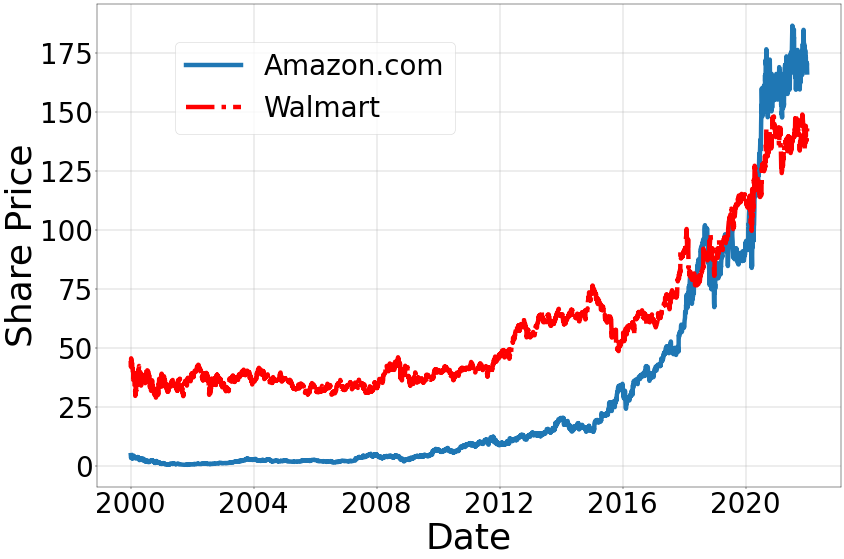

In [ ]:
dates = amazon_plain['AMZN'].index
amzn_price = amazon_plain['AMZN'].values
wmt_price = walmart_plain['WMT'].values

plt.figure(figsize=(24,16), dpi= 40)
plt.plot(dates,amzn_price,label='Amazon.com',linewidth=8)
plt.plot(dates,wmt_price,'r-.',label='Walmart',linewidth=8)
plt.xticks(fontsize=50, horizontalalignment='center')
plt.legend(bbox_to_anchor=(0.50, 0.95),fontsize=50)
plt.yticks(fontsize=50)
plt.grid(axis='both')
plt.xlabel('Date', fontsize = 65)
plt.ylabel('Share Price', fontsize = 65)

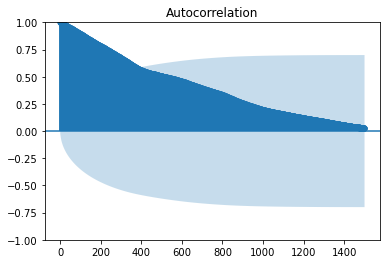

In [ ]:
sm.graphics.tsa.plot_acf(amzn_price, lags=1500)
plt.show()

/Users/isikbicer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


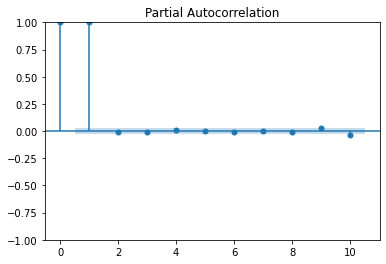

In [ ]:
sm.graphics.tsa.plot_pacf(amzn_price, lags=10)
plt.show()

In [ ]:
amzn_tsa = sm.tsa.arima.ARIMA(amzn_price, order=(1, 1, 10))
amzn_res = amzn_tsa.fit()
print(amzn_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5536
Model:                ARIMA(1, 1, 10)   Log Likelihood               -7938.445
Date:                Sun, 06 Nov 2022   AIC                          15900.890
Time:                        15:07:40   BIC                          15980.316
Sample:                             0   HQIC                         15928.585
                               - 5536                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0242      0.142     -0.171      0.865      -0.302       0.254
ma.L1          0.0022      0.141      0.016      0.988      -0.275       0.279
ma.L2         -0.0080      0.006     -1.350      0.1

In [ ]:
forecast_model = amzn_res.get_forecast(steps=10)
forecast_CI = forecast_model.conf_int()
forecast_mean = forecast_model.predicted_mean


forecast_mean

array([166.72611024, 166.90552372, 166.99792807, 166.99084352,
       166.92327029, 167.07261645, 166.91328121, 167.04436681,
       166.96530351, 167.05232346])

In [ ]:
forecast_CI

array([[164.7360164 , 168.71620407],
       [164.12187344, 169.689174  ],
       [163.60975897, 170.38609717],
       [163.16549329, 170.81619376],
       [162.69095793, 171.15558265],
       [162.48407996, 171.66115293],
       [161.99782412, 171.82873829],
       [161.80585312, 172.28288049],
       [161.44242949, 172.48817754],
       [161.23532117, 172.86932576]])